<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Pytorch/blob/main/Notebooks/Pytorch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Model

## Prerequrities

**Computer Vision libraries in PyTorch :**
1. [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for PyTorch computer vision
2. `torchvision.datasets` - Creating data sets and **data loading** functions
3. `torch.vision.models` - pretrained computer vision models
4. `torchvision.transforms` - functions to manipulate vision data (images) to be suitable for our machine learning model
5. `torch.utils.data.Dataset` - Base dataset class for PyTorch
6. `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Imports PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader
# Import PyTorch Computer vision libraries
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
# Import matplotlib for visualization
import matplotlib.pyplot as plt
# Import numpy and pandas for preparing data
import numpy as np
import pandas as pd

## 1 . Creating datasets

The dataset we'll be using is [`FashionMNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST ) from torchvision.datasets -

In [ ]:
# setup training data
train_data = torchvision.datasets.FashionMNIST( # despite calling datasets from torchvision I call our dataset this way by purpose
    root = "data" , # where to put data
    train = True , # training or test data set
    download = True , # do download data set
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targets?
)
# setup test data
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

### 1.1 take a look at our data

In [ ]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
len(train_data.data) ,  len(train_data.targets)

(60000, 60000)

In [ ]:
train_data.data.shape , train_data.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
train_data.class_to_idx , train_data.targets.unique()

({'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
# another way of looking at our data
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
# printing out some informations
print(f"image shape : {image.shape} -> [color_channel , height , width]")
print(f"label / target : {label}")
print(f"label name / Image name : {train_data.classes[label]}")

image shape : torch.Size([1, 28, 28]) -> [color_channel , height , width]
label / target : 9
label name / Image name : Ankle boot


### 1.2 Visualizing data

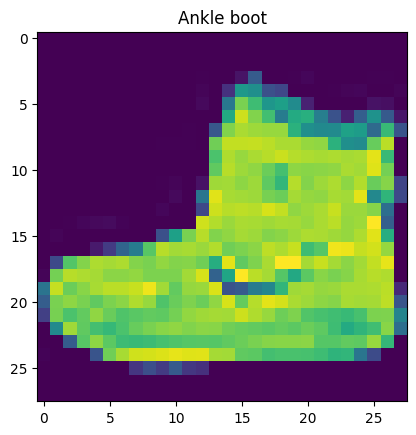

In [ ]:
# color image
image , label = train_data[0]

plt.imshow(image.squeeze())
plt.title(train_data.classes[label]) ; # there is a trick here
plt.axis = False

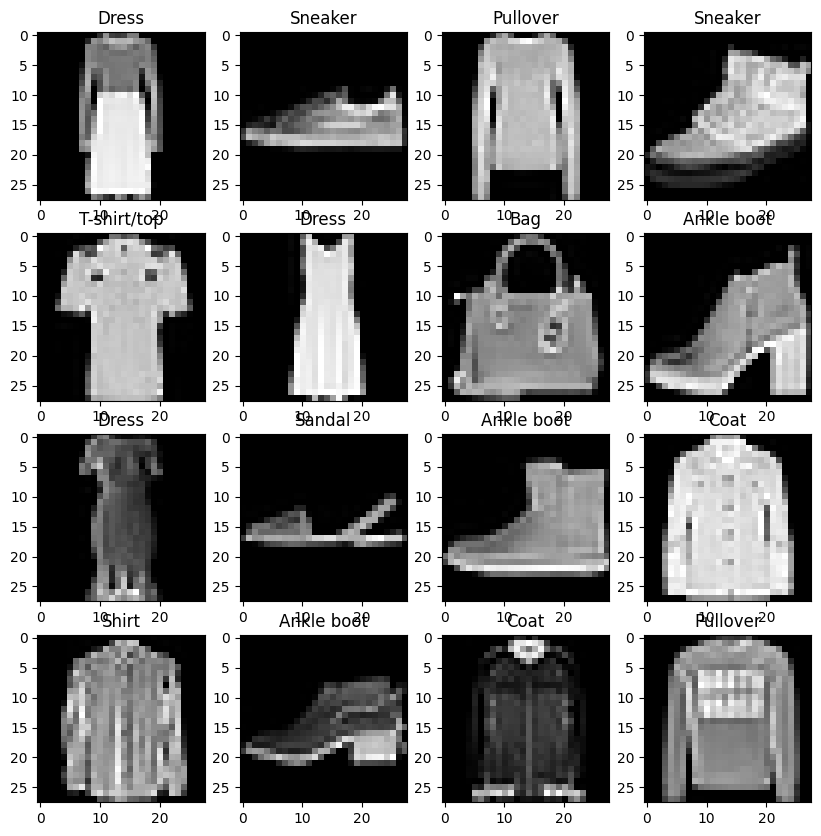

In [ ]:
# plot more images
# gray image

rows , columns = 4 , 4
fig = plt.figure(figsize=(10,10)) ;

for i in range(1,rows*columns+1):
  random_indx = torch.randint(0,len(train_data),size=[1]).item()
  image , label = train_data[random_indx]
  fig.add_subplot(rows,columns,i) ;
  plt.imshow(image.squeeze() , cmap = "gray")
  plt.title(train_data.classes[label])
  plt.axis = False

## 2 . Preparing Dataloader

why using dataloader ?

1.  improve our computation efficency by breaking our images down to the batches because our memory may not be enough for looking at all of data at once .
2. gives our neural network more chances to update its gradients per epoch .

**Note :** DataLoader turns our dataset into a Python iterable.

In [ ]:
# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn data sets into iterables and breaking down the data sets to batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

### 2.1 take a look at dataloaders

In [ ]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [ ]:
len(train_data)/BATCH_SIZE , len(test_data)/BATCH_SIZE

(1875.0, 312.5)

### 2.2 checking what's inside dataloaders

In [ ]:
train_feature_batch , train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape , len(train_feature_batch) # [batch_size , color_channel , heighth , width]

(torch.Size([32, 1, 28, 28]), 32)

In [ ]:
# we also could use list(iter(train_dataloader))
next(iter(train_dataloader)) , type(next(iter(train_dataloader)))

([tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
  
  
          [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0078, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
  
  
          [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]

In [ ]:
# be carefull about difference between list(iter(train_dataloader)) & next(iter(train_dataloader))

len(list(iter(train_dataloader))) , len(next(iter(train_dataloader))) , len(iter(train_dataloader))

(1875, 2, 1875)

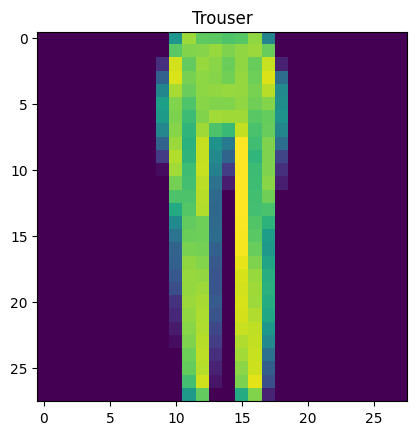

In [ ]:
# random index (selecting batch)
rand_idx_1 = torch.randint(0,len(iter(train_dataloader)),size=[1]).item()
image_batch , label_batch = list(iter(train_dataloader))[rand_idx_1]
rand_idx_2  = torch.randint(0,len(image),size=[1]).item()
image ,label = image_batch[rand_idx_2] , label_batch[rand_idx_2]
plt.imshow(image.squeeze()) ;
plt.title(f"{train_data.classes[label]}") ;

## setup device-agnostic code

In [ ]:
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!nvidia-smi

Sun Jul  2 23:03:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    31W /  70W |   1125MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 3 . Build a Model (Baseline line)

**Q :**  what is a `baseline` model ?

**A :**  a baseline model is model that would be improved upon subsequent models or mabye expriments


### 3.1  Creat a class for forward pass

In [ ]:
# Creat flatten layer as we would work with linear layers
flatten_fn = nn.Flatten()
# pick a image
x = train_feature_batch[0]
# flatten the data
output = flatten_fn(x)

# printing out the result
print(f"input/image shape : {x.shape}  ->  [color_channel , height , width]")
print(f"output or flatten image shape : {output.shape}   [color_channel , height*width]")

input/image shape : torch.Size([1, 28, 28])  ->  [color_channel , height , width]
output or flatten image shape : torch.Size([1, 784])   [color_channel , height*width]


In [ ]:
class ComputerVision_0(nn.Module) :
  def __init__(self,
               input_shape : int,
               hidden_unit : int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
       nn.Flatten(),
       nn.Linear(in_features=input_shape , out_features=hidden_unit),
       nn.ReLU() ,
       nn.Linear(in_features=hidden_unit, out_features=hidden_unit),
       nn.ReLU() ,
       nn.Linear(in_features=hidden_unit,out_features=output_shape)
    )

  def forward(self, x) :
    return self.layer_stack(x)


In [ ]:
# set manual seed
torch.manual_seed(42)
# Creat an instance of our model with hyperparameters
model_0 = ComputerVision_0(input_shape=28*28 , # according to the flatten layer output shape = [1,784]
                           hidden_unit = 10,
                           output_shape=len(train_data.classes)).to(device)

model_0

ComputerVision_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# take a look at our created model (make predictions)
torch.manual_seed(42)
random_tensor = torch.rand([1 , 1 , 28 , 28]).to(device) # we choosed to preform one image for our model
model_0(random_tensor)

tensor([[-0.0130,  0.0087,  0.1175, -0.3350, -0.2157,  0.3650, -0.7423,  0.1544,
         -0.3046,  0.3387]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

### 3.2 setup loss function and optimizer and evaluation metrics

**loss function :** `nn.CrossEntropyLoss`

**optimizer :** `torch.optim.SGD`

**evaluation metrics :** for this model we would use `accuracy_fn()`

In [ ]:
# setup loss function
loss_fn = nn.CrossEntropyLoss()
# setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)
# importing accuracy function
import requests
from pathlib import Path
## some if-else codes
if Path("helper_function.py").is_file() :
  print("the file already exists , slipping download")
else :
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f :
    f.write(request.content)
    print("downloading helper_function.py")

from helper_function import accuracy_fn

the file already exists , slipping download


### 3.3 Creat a function to time our expriments

why creat a function to time our expriments ?

beacase that there is two important thing that we always track about  models :

1. how nice it preforms (model performance)
2. how quik it preforms

In [ ]:
from timeit import default_timer as timer
def print_train_time(start :float,
                     end : float ,
                     device : torch.device) :
  train_time = end - start
  print(f"train time on {device} : is {train_time:.5f} seconds")
  return train_time

In [ ]:
start = timer()
# some code
end = timer()
print_train_time(start=start,end=end,device="cuda")

train time on cuda : is 0.00004 seconds


4.4114000047557056e-05

## 4 . Build a training and testing loop

In [ ]:
# importing tqdm module for creating a prograss bar how cool !
from tqdm.auto import tqdm

# set the manual seed
torch.manual_seed(42)

# set the timer to start
start_time  = timer()

#set epochs
epochs = 3   # keeping epochs not a lot for our model better performance as we loop per batch

# training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"{epoch}\n-----------")
  ### Training
  train_loss = 0
  model_0.train()
  for batch , (X,y) in enumerate(train_dataloader) :
    # 0. put data  on target device
    X , y = X.to(device) , y.to(device)
    # 1. foraward pass
    predictions = model_0(X)
    # 2. calculate the loss
    loss = loss_fn(predictions,y)
    train_loss += loss
    # 3. optimize zero grad
    optimizer.zero_grad()
    # 4. loss backward
    loss.backward()
    # 5.optmizer step
    optimizer.step()
    ## printing out what's happening !
    if batch % 400 == 0 :
      print(f"looking at {batch * len(X)}/{len(train_data)} samples")
  # calculate average train loss per batch
  train_loss /= len(train_dataloader)
  ### Testing
  test_loss = 0
  test_acc = 0
  model_0.eval()
  with torch.inference_mode() :
    for X_test , y_test in test_dataloader :
      # 0. put data on target device
      X_test , y_test = X_test.to(device) , y_test.to(device)
      # 1. foraward pass
      test_pred = model_0(X_test)
      # 2. calculate the loss
      test_loss += loss_fn(test_pred,y_test)
      # 3. calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test , y_pred=test_pred.argmax(dim=1)) # be carefull about this
    # calculate average loss per batch
    test_loss /= len(test_dataloader)
    # calculate average accuracy per batch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"train loss : {train_loss}  |  test losss : {test_loss}  |  test accuracy {test_acc}")

# stop the timer
end_time  = timer()
common_model_time = print_train_time(start=start_time,
                 end=end_time,
                 device="cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

0
-----------
looking at 0/60000 samples
looking at 12800/60000 samples
looking at 25600/60000 samples
looking at 38400/60000 samples
looking at 51200/60000 samples
train loss : 0.6676768064498901  |  test losss : 0.50091552734375  |  test accuracy 82.08865814696486
1
-----------
looking at 0/60000 samples
looking at 12800/60000 samples
looking at 25600/60000 samples
looking at 38400/60000 samples
looking at 51200/60000 samples
train loss : 0.4834449291229248  |  test losss : 0.48895612359046936  |  test accuracy 82.68769968051119
2
-----------
looking at 0/60000 samples
looking at 12800/60000 samples
looking at 25600/60000 samples
looking at 38400/60000 samples
looking at 51200/60000 samples
train loss : 0.44954994320869446  |  test losss : 0.4858045279979706  |  test accuracy 82.8873801916933
train time on cuda : is 37.53914 seconds


In [ ]:
len(train_dataloader.dataset)

60000

In [ ]:
test_pred = model_0(X)
test_pred.argmax(dim=1)

tensor([5, 1, 3, 8, 4, 7, 9, 2, 6, 9, 4, 3, 3, 4, 3, 3, 9, 1, 0, 0, 3, 8, 5, 5,
        0, 9, 3, 3, 9, 4, 2, 1], device='cuda:0')

In [ ]:
len(list(enumerate(train_dataloader)))

1875

In [ ]:
len(list(enumerate(train_dataloader))[0][1][0])

32

### 4.1 evaluating model results ( predictions ) function

In [ ]:
torch.manual_seed(42)
def eval_model(model : torch.nn.Module,
               dataloader : torch.utils.data.dataloader,
               loss_function : torch.nn.Module ,
               accuracy_function) -> dict :
  """ A function to recieve created model , make predictions and returning a dictionary of name , accuracy , loss of function"""
  loss , acc = 0 , 0
  model.eval()
  with torch.inference_mode() :
    # time to make prediction
    for X , y in dataloader :
      # put data on target device
      X , y = X.to(device) , y.to(device)
      y_pred = model(X)
      # calculate total loss and total accuracy
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))
    # calculate average accuracy and average loss per batch
    loss  /= len(dataloader)
    acc /= len(dataloader)
    # return
    return {"model name" : model.__class__.__name__,
            "model_accuracy" : acc,
            "model loss" : loss.item() }

# evaluating model_0 results based on test dataset
model_0_eval_result = eval_model(model=model_0,
                                 accuracy_function=accuracy_fn,
                                 loss_function = loss_fn,
                                 dataloader = test_dataloader)
model_0_eval_result

{'model name': 'ComputerVision_0',
 'model_accuracy': 82.8873801916933,
 'model loss': 0.4858045279979706}

## 5 . Using non-linearity for creating better models

## 6 . Functionizing training and testing loops

lets create afunction for :

* training loop : `train_step()`
* testing loop : `test_step()`

In [ ]:
def train_step(model : nn.Module ,
               loss_function : nn.Module ,
               accuracy_function ,
               optimizer : torch.optim,
               device : torch.device ,
               dataloader : torch.utils.data.DataLoader
               ) :
    """training model for better predictions"""
    train_loss , train_acc = 0 , 0
    ### training
    # put model on training mode
    model.train()
    # looping through training batches
    for batch , (x,y) in enumerate(dataloader) :
      # put the data on target device
      x , y = x.to(device) , y.to(device)
      # 1 . forward pass (reciving raw logits from model)
      y_pred = model(x)
      # 2 . clculate the loss and accuracy (per batch)
      loss = loss_function(y_pred,
                           y)
      train_loss += loss
      train_acc += accuracy_function(y_true = y ,
                                     y_pred = y_pred.argmax(dim=1)) # going from raw logits -> prediction lables
      # 3 . optmize zero-grad
      optimizer.zero_grad()
      # 4 . Loss backward
      loss.backward()
      # 5 . optimizer step
      optimizer.step()
    # calculate the average loss and accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    # printing out results
    print(f"train loss : {train_loss:.5f}  | train accuracy : {train_acc:.5f}%")

In [ ]:
def test_step(model : nn.Module ,
              dataloader : torch.utils.data.DataLoader,
              loss_function : nn.Module ,
              accuracy_function,
              device : torch.device) :
    ### testing
    test_loss , test_accuracy = 0 , 0
    # putting model on eval mode
    model.eval()
    # turning on inference mode context manager
    with torch.inference_mode() :
      for x , y in dataloader :
        # 0 . send data to the target device
        x , y = x.to(device) , y.to(device)
        # 1 . make predictions
        y_pred = model(x)
        # 2 . calculate loss and accuracy
        test_loss += loss_function(y_pred,y)
        test_accuracy += accuracy_function(y_true=y,
                                          y_pred = y_pred.argmax(dim=1)) # going from logits ->  prediction lables
      # 3 . calculate average test loss and accuracy
      test_loss /= len(dataloader)
      test_accuracy /= len(dataloader)
      # 4 . print out results
      print(f"test loss : {test_loss:.5f}  | test accuracy : {test_accuracy:.5f} %\n")

## 7 . Create a Convoloutional Neural Networks (CNNs) Model

CNNs are also known as ConvNets

there is different architectures of CNNs like VGG-16(we would look at that at next notebook)

for more detail's about CNNs see website : [CNNs](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

for more detalis about VGG architecture look : [VGG](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)

for reading about TonyVGG class : [TinyVGG](https://github.com/poloclub/cnn-explainer/blob/master/tiny-vgg/tiny-vgg.py)

In [ ]:
# Create a convolutional neural network
class Computer_Vision_CNN(nn.Module) :

  """ this class is based on TinyVGG architecture """

  def __init__(self, input_shape : int , hidden_unit : int , output_shape : int) :
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_unit ,
                  kernel_size = 3 ,
                  stride = 1 ,
                  padding = 1) ,
        nn.ReLU() ,
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3 ,
                  stride = 1 ,
                  padding = 1) ,
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels  = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding  = 1) ,
        nn.ReLU() ,
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3 ,
                  stride = 1 ,
                  padding = 1) ,
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten() ,
        nn.Linear(in_features = hidden_unit*7*7 , # 7 equals 28/4 that 28  is the dimensions of input images and 4=2*2 if for the 2 times that maxpool works ,
                  out_features = output_shape)
    )
  def forward(self,x) :
    y = self.classifier(self.conv_block_2(self.conv_block_1(x)))
    return y

In [ ]:
torch.manual_seed(42)
model_CNN = Computer_Vision_CNN(input_shape = 1 ,
                                hidden_unit = 10 ,
                                output_shape = len(train_data.classes)).to(device)

In [ ]:
random_image = torch.randn(size=(1,28,28))
random_image.shape

torch.Size([1, 28, 28])

In [ ]:
prediction = model_CNN(random_image.unsqueeze(0).to(device))
prediction

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

Documentation for `nn.Conv2d()` : [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

In [ ]:
import random
torch.manual_seed(42)
image_random_batch = torch.randn(32,3,64,64)
random_batch_image = image_random_batch[random.choice(range(len(image_random_batch)))]

# printing out random batch created details
print(f"image batch shape : {image_random_batch.shape}")
print(f"batch images shape are : {random_batch_image.shape}")

image batch shape : torch.Size([32, 3, 64, 64])
batch images shape are : torch.Size([3, 64, 64])


In [ ]:
conv_layer = nn.Conv2d(in_channels = 3,
                      out_channels  = 10 ,
                      kernel_size = 3,
                      stride = 1 ,
                      padding = 1)

**Tip :** The image tensors must be unsqueezed before inputing to the `Conv2d`

In [ ]:
conv_image  = conv_layer(random_batch_image.unsqueeze(0))
print(f"the random batch image shape is : {random_batch_image.unsqueeze(0).shape}")
print(f"the convoloution layer result is : {conv_image.shape}")

the random batch image shape is : torch.Size([1, 3, 64, 64])
the convoloution layer result is : torch.Size([1, 10, 64, 64])


### 7.2 Stepping through `nn.ReLU()`

Documentation for nn.ReLU() : [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

In [ ]:
image_relu = nn.ReLU()
relu_image = image_relu(conv_image)
relu_image.shape

torch.Size([1, 10, 64, 64])

**Tip :** Don't do *relu_image = nn.ReLU(conv_image)*

### 7.3 Stepping through `nn.MaxPool2d()`

Documentation for `nn.MaxPool2d()` : [MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)

In [ ]:
maxpool_layer = nn.MaxPool2d(kernel_size = 2)
image_maxpool = maxpool_layer(relu_image)
print(f"shape of image tensor after passing maxpool is : {image_maxpool.shape}")
print(f"shape of image tensor before passing maxpool is : {relu_image.shape}")

shape of image tensor after passing maxpool is : torch.Size([1, 10, 32, 32])
shape of image tensor before passing maxpool is : torch.Size([1, 10, 64, 64])


a closer look at what `nn.MaxPool2d` does

In [ ]:
torch.manual_seed(42)
random_tensor  = torch.randn(1,1,2,2)
random_maxpool = maxpool_layer(random_tensor)
print(f"random tensor is : \n {random_tensor}")
print(f"maxpool tensor is : \n {random_maxpool}")

random tensor is : 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
maxpool tensor is : 
 tensor([[[[0.3367]]]])


### 7.4 Stepping through `nn.Flatten()`

In [ ]:
flatten_layer  = nn.Flatten()
image_flatten = flatten_layer(image_maxpool)

In [ ]:
image_flatten.shape

torch.Size([1, 10240])

### 7.5 setup loss function and optimizer for `model_CNN`

In [ ]:
# Accuracy function
from helper_function import accuracy_fn
# loss function
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer  = torch.optim.SGD(lr=0.01 ,
                             params=model_CNN.parameters())

### 7.5 training and testing our `model_CNN` using our training and testing function

In [ ]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)
# Measure time
from timeit import default_timer as timer
start_time  = timer()
# training and testing
epochs = 3
for epoch in tqdm(range(epochs)) :
  print(f"epochs {epoch} :  \n--------")
  train_step(model= model_CNN ,
             dataloader = train_dataloader,
             device = device ,
             loss_function=loss_fn,
             accuracy_function=accuracy_fn,
             optimizer=optimizer)
  test_step(model = model_CNN ,
            dataloader = test_dataloader ,
            loss_function = loss_fn ,
            accuracy_function = accuracy_fn,
            device  = device)

end_time = timer()
model_CNN_time = print_train_time(start=start_time ,
                                  end = end_time ,
                                  device  = device)

  0%|          | 0/3 [00:00<?, ?it/s]

epochs 0 :  
--------
train loss : 1.03793  | train accuracy : 62.18667%
test loss : 0.66169  | test accuracy : 75.18970 %

epochs 1 :  
--------
train loss : 0.55002  | train accuracy : 80.05167%
test loss : 0.49857  | test accuracy : 82.29832 %

epochs 2 :  
--------
train loss : 0.45489  | train accuracy : 83.55667%
test loss : 0.44226  | test accuracy : 84.39497 %

train time on cuda : is 64.80956 seconds


### 7.6 get CNN model results

In [ ]:
CNN_model_results = eval_model(model= model_CNN ,
                               accuracy_function=accuracy_fn,
                               loss_function = loss_fn,
                               dataloader = test_dataloader)
CNN_model_results

{'model name': 'Computer_Vision_CNN',
 'model_accuracy': 84.39496805111821,
 'model loss': 0.4422632157802582}

## 8 . Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_eval_result
                              , CNN_model_results])
compare_results

,model name,model_accuracy,model loss
0,ComputerVision_0,82.887380,0.485805
1,Computer_Vision_CNN,84.394968,0.442263


In [ ]:
compare_results["training time"] = [common_model_time,
                                    model_CNN_time]
compare_results

,model name,model_accuracy,model loss,training time
0,ComputerVision_0,82.887380,0.485805,37.539137
1,Computer_Vision_CNN,84.394968,0.442263,64.809559


In [ ]:
model_accuracy_series = compare_results.set_index("model name")["model_accuracy"]
model_accuracy_series

model name
ComputerVision_0       82.887380
Computer_Vision_CNN    84.394968
Name: model_accuracy, dtype: float64

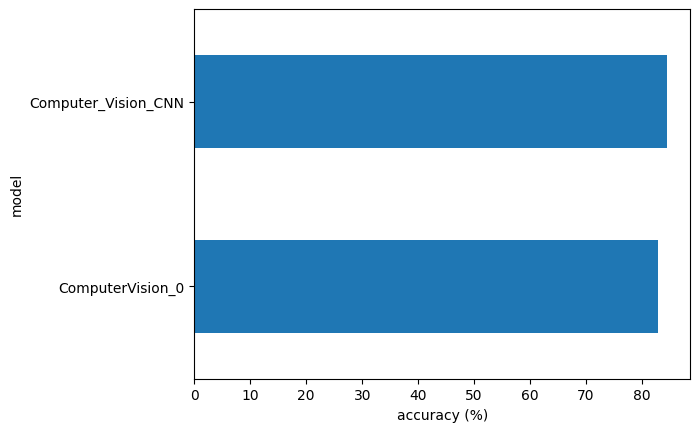

In [ ]:
model_accuracy_series.plot(kind="barh") ;
plt.xlabel("accuracy (%)") ;
plt.ylabel("model") ;

## 9 . make and evaluate random prediction with `CNN` model

In [ ]:
def make_prediction(model : nn.Module,
                    data :list ,
                    device : torch.device = device) :
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode() :
      for sample in data :
        # add a batch dimension and send it to the target dimension
        sample  = torch.unsqueeze(sample,dim=0).to(device)
        # create logits (forward pass)
        logits = model(sample)
        # make prediction lables
        pred_prob = torch.softmax(logits.squeeze(dim=0),dim=0)
        pred_probs.append(pred_prob)
    # stack the obtained data
    return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)

test_lables = []
test_samples = []
for sample , label in random.sample(list(test_data),k=9) :
  test_lables.append(label)
  test_samples.append(sample)

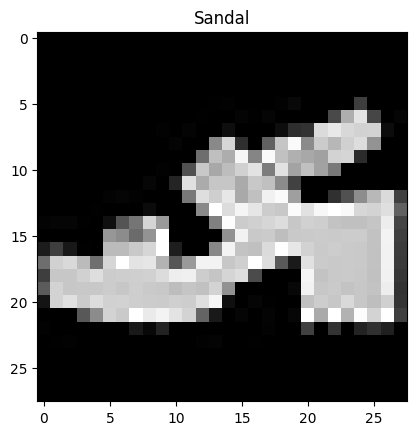

In [ ]:
# take a glance at a random image
plt.imshow(test_samples[0].squeeze(dim=0),cmap="gray") ;
plt.title(f"{test_data.classes[test_lables[0]]}") ;
# Just for test not importatnt ( could be deleted !)
# plt.imshow(np.asarray(test_data.data[0]),cmap="gray") ;
# plt.title(test_data.targets[0])

In [ ]:
# Make Prediction
sample_pred_probs = make_prediction(model = model_CNN ,
                                    data = test_samples ,
                                    device = device )

In [ ]:
# Convert prediction probilities to lables
sample_pred_lables = sample_pred_probs.argmax(dim=1)
sample_pred_lables

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1], device='cuda:0')

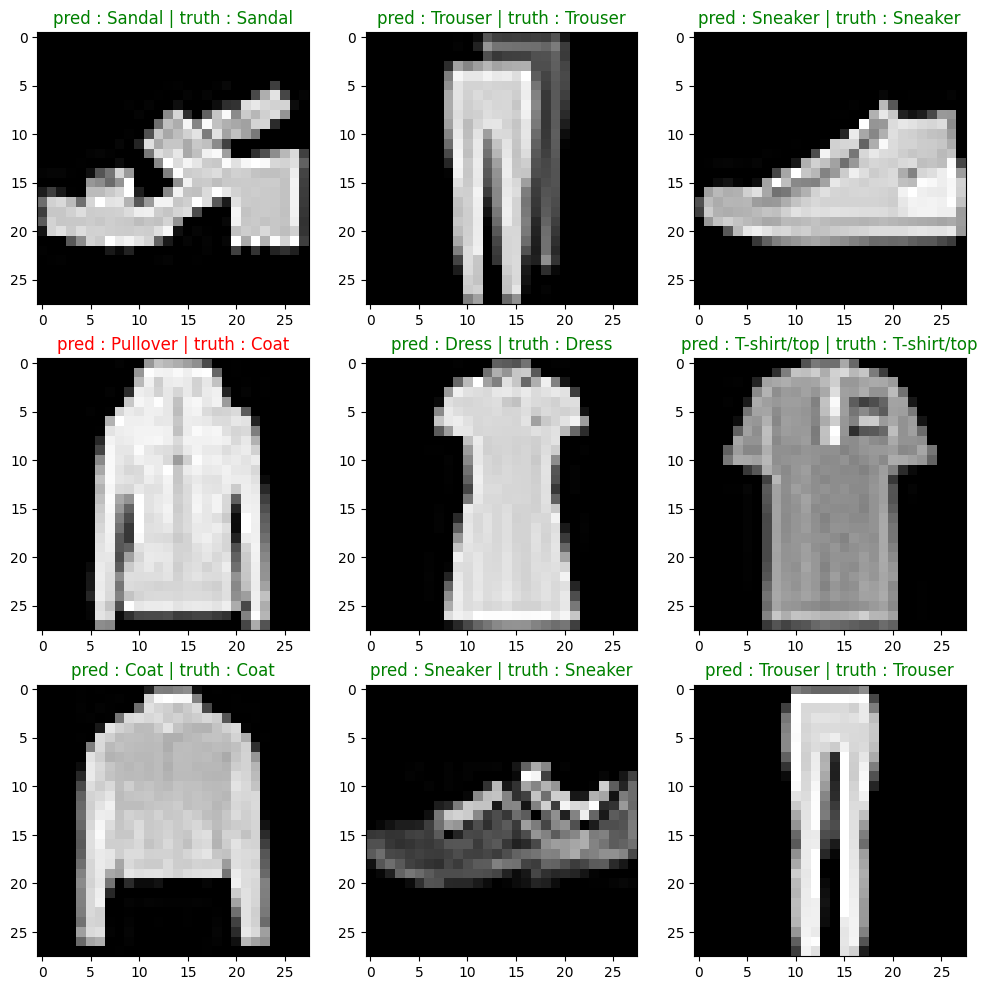

In [ ]:
# Plot prediction
plt.figure(figsize=(12,12))
for i in range(len(test_samples)) :
  plt.subplot(3,3,i+1) ;
  plt.imshow( test_samples[i].squeeze(dim=0) ,cmap = "gray") ;
  if test_lables[i]  == sample_pred_lables[i] :
    plt.title(f"pred : {test_data.classes[sample_pred_lables[i]]} | truth : {test_data.classes[test_lables[i]]}" , color = "g")
  else :
    plt.title(f"pred : {test_data.classes[sample_pred_lables[i]]} | truth : {test_data.classes[test_lables[i]]}" , color = "r")

## 10 . Make a `Confusion Matrix` for further prediction evaluation

1.   Making prediction on test dataset `dataloader`
2.   Making confusion matrix by `torchmetrics.ConfusionMatrix`
3.   Plot Confusion Matrix by `mlxtend.plotting.plot_confusion_matrix()`


In [ ]:
# Import tqdm
from tqdm.auto import tqdm

# 1 . Making Predictions
preds = []
model_CNN.eval()
with torch.inference_mode() :
  for X , y in tqdm(test_dataloader, desc = "Making Predictions .... ") :
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # Do forward pass
    logits = model_CNN(X)
    # Raw prediction(logits) -> Prediction Probilities -> Prediction Lables
    pred = torch.softmax(logits.squeeze() , dim=0).argmax(dim=1)
    preds.append(pred)
    # Concatenate list of prediction into a tensor
    pred_tensor = torch.cat(preds)

Making Predictions .... :   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
len(pred_tensor)

10000

In [ ]:
try :
  import torchmetrics , mlxtend
  print(f"mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19 , "torchmetrics version must be greather than 19"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics , mlxtend
  print("\n** mlxtend version **")
  print(f"mlxtend version : {mlxtend.__version__}")

mlxtend version : 0.22.0


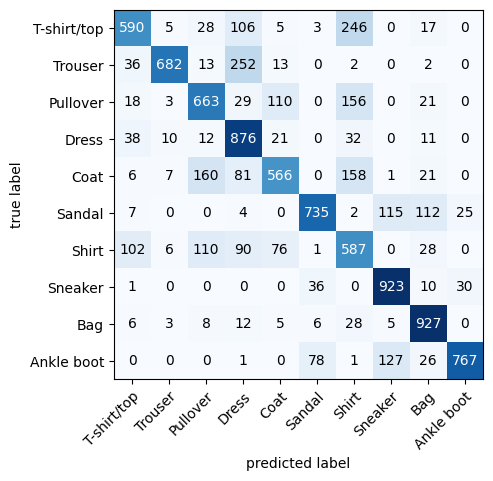

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# 2 . Setup Confusion Matrix
# be carefull of putting data sets and confusion matrix on same device !
confmat = ConfusionMatrix(num_classes = len(test_data.classes),
                          task = 'multiclass').to(device)
confmat_tensor = confmat(preds = pred_tensor.to(device) ,
                         target = test_data.targets.to(device))
# 3 . Plotting Confusion Matrix
fig , ax = plot_confusion_matrix(conf_mat= confmat_tensor.cpu().numpy() ,     # Parameter A : confusion matrix tensor
                                 class_names = test_data.classes)             # Parameter B : classes names of dataset

## 11 . Load and save best performing model

In [ ]:
from pathlib import Path

# 1 . Create the place to save model
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents =True ,
                 exist_ok = True)
# 2 . Creating the file to save model
MODEL_FILE = "pytorch_03 CNN Neural Network.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_FILE

# 3 . Save the model
torch.save(obj = model_CNN.state_dict(),
           f = MODEL_SAVE_PATH)

In [ ]:
 torch.manual_seed(42)
 torch.cuda.manual_seed(42)

 # 1 . Create an instance model
 instance_model = Computer_Vision_CNN(input_shape = 1,
                                      hidden_unit = 10,
                                      output_shape = 10)
 # 2 . load the saved model to instance model
 instance_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
 instance_model.to(device) ;
 # 3 . evalute model accuracy
 instance_model_results  = eval_model(model = instance_model,
                                    dataloader = test_dataloader ,
                                    loss_function = loss_fn ,
                                    accuracy_function = accuracy_fn)
 instance_model_results

{'model name': 'Computer_Vision_CNN',
 'model_accuracy': 84.39496805111821,
 'model loss': 0.4422632157802582}

In [ ]:
torch.isclose(torch.tensor(instance_model_results['model_accuracy']),
              torch.tensor(CNN_model_results['model_accuracy']),
              atol = 1e-12)

tensor(True)

**and finish it's over**